# Player evaluation

Here we compare players based on their adjusted points. Also, we calculate some useful metrics using the adjusted points to further evaluate player performance in FPL.

In [1]:
# recent gameweek
gameweek = 13

In [2]:
# import basic libraries
import pandas as pd
import numpy as np
import requests
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

pd.set_option('max_columns',100)

In [3]:
# fetch FPL data
filepath = '../data/fpl/data_week' + str(gameweek) + '.csv'
df = pd.read_csv(filepath, index_col=0)

# fetch team data
filepath = '../data/fbref/team_stats_week' + str(gameweek) + '.csv'
teamStats = pd.read_csv(filepath, index_col=0)

# fetch player stats data
filepath = '../data/fbref/player_stats_week' + str(gameweek) + '.csv'
playerStats = pd.read_csv(filepath, index_col=0, skiprows=1)

## Value and value points

Here we calculate two interesting metrics: 'value' and 'value points'. 

Value is simply adjusted points per game divided by the cost of the player. Essentially, this measures how many 'points per pound(/euro/whatever)' has the player gained on an average game week. 

The value points is calculated as the geometric mean of a players adjusted points per game and value. Essentially, in FPL we want to gain the maximum possible amount of points. However, we are restrained by a limited budget, so that in practice we cannot just pick all the best players. Then, we would like to have a squad of players that give the most points given our budget. Thus, we would like to pick players that have high value ('bang for buck'). However, often the players with highest value are very cheap players who somewhat overperform relative to their price. Picking a squad full of these players might leave a part of our budget unused. Calculating the geometric mean of adjusted points and value allows us to weigh both aspects equally, i.e. we want players that both gain a lot of points but also have good value. For example, this metric values equally two players, where one has twice the points per game of the other who in turn has twice the value of the other.

In [4]:
# value = expected points / cost
df['value'] = df['adjusted points per game'] / (df['now_cost'] / 10.0)
df['value form 5'] = df['form 5'] / (df['now_cost'] / 10.0)
df['value form 10'] = df['form 10'] / (df['now_cost'] / 10.0)
# geometric mean of 'adjusted points per game' and 'value'
df['valuePoints metric'] = np.sqrt(df['adjusted points per game'] * df['value'])

In [5]:
df['value_next10']  = df['xPoints_next10'] / (df['now_cost'] / 10.0)

In [6]:
df['xG+xA'] = df['xG'] + df['xA']
df['xG+xA per game'] = df['xG+xA'] / df['games played']

In [7]:
goalkeepers = df['element_type'] == 1
defenders = df['element_type'] == 2
midfielders = df['element_type'] == 3
forwards = df['element_type'] == 4

minGames = df['games played'] >= 3

## Player evaluation

Below we compile lists for each position sorting players based on a given metric.

Notice that 'next1_xP' is currently based on preseason expectations on average player performance!

In [8]:
metric = 'valuePoints metric'
#metric = 'adjusted points per game'
#metric = 'next1_xP'

numberToShow = 40

print('GOALKEEPERS')
display(df[goalkeepers & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'xPoints_next10', 'valuePoints metric']].head(20))
print('DEFENDERS')
display(df[defenders & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'xPoints_next10','valuePoints metric']].head(numberToShow))
print('MIDFIELDERS')
display(df[midfielders & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'xPoints_next10','valuePoints metric']].head(numberToShow))
print('FORWARDS')
display(df[forwards & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'xPoints_next10','valuePoints metric']].head(numberToShow))

GOALKEEPERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,xPoints_next10,valuePoints metric
id,,,,,,,,,,,
475,Sá,Wolves,50,13.0,58,57.893988,4.5,4.453384,4.715338,37.931086,1.991614
376,Foster,Watford,41,8.0,28,30.968931,3.5,3.871116,4.833942,36.085936,1.911808
556,Fernández,Brentford,45,4.0,15,16.046740,3.8,4.011685,3.805882,35.476936,1.891126
146,Guaita,Crystal Palace,46,13.0,47,50.426310,3.6,3.878947,4.454159,40.017099,1.808568
353,Lloris,Tottenham,54,12.0,50,49.600370,4.2,4.133364,3.955409,37.241012,1.778717
80,Raya,Brentford,44,9.0,34,33.355166,3.8,3.706130,2.986388,39.369005,1.766828
559,Ramsdale,Arsenal,49,10.0,54,37.891629,5.4,3.789163,4.723315,38.955453,1.711769
30,Martínez,Aston Villa,55,12.0,52,47.928057,4.3,3.994005,4.726393,37.652648,1.703049
143,Mendy,Chelsea,63,12.0,61,51.209988,5.1,4.267499,4.544352,42.478012,1.700212


DEFENDERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,xPoints_next10,valuePoints metric
id,,,,,,,,,,,
135,Chilwell,Chelsea,58,6.0,54,36.775994,9.0,6.129332,6.876605,52.287739,2.545067
237,Alexander-Arnold,Liverpool,79,11.0,88,76.053595,8.0,6.913963,7.269056,47.713468,2.459878
256,Cancelo,Manchester City,67,13.0,80,79.497172,6.2,6.115167,6.521419,41.799009,2.362495
142,James,Chelsea,63,10.0,76,56.358990,7.6,5.635899,8.012752,46.627041,2.245396
122,Alonso,Chelsea,56,7.0,41,36.393493,5.9,5.199070,5.186341,43.887830,2.197008
245,Tsimikas,Liverpool,39,6.0,30,24.401870,5.0,4.066978,5.863273,31.406546,2.059395
527,Chalobah,Chelsea,48,8.0,52,35.139992,6.5,4.392499,4.762324,42.834666,2.004892
258,Aké,Manchester City,48,4.0,15,16.520668,3.8,4.130167,1.000000,33.848755,1.885155
370,Reguilón,Tottenham,51,11.0,50,46.367339,4.5,4.215213,6.238953,34.752892,1.866528


MIDFIELDERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,xPoints_next10,valuePoints metric
id,,,,,,,,,,,
268,Torres,Manchester City,67,4.0,26,25.351167,6.5,6.337792,NaN,36.243578,2.448503
233,Salah,Liverpool,130,13.0,131,106.925721,10.1,8.225055,8.016314,60.233423,2.281220
250,Gündogan,Manchester City,72,9.0,48,52.751376,5.3,5.861264,7.312911,43.193470,2.184364
240,Jota,Liverpool,77,12.0,68,70.986435,5.7,5.915536,6.747140,47.714607,2.131811
144,Gallagher,Crystal Palace,61,12.0,69,61.137995,5.8,5.094833,6.251940,39.784038,2.062838
265,Foden,Manchester City,82,8.0,41,44.202334,5.1,5.525292,6.820515,49.571394,1.929516
125,Kovacic,Chelsea,51,9.0,46,38.169373,5.1,4.241041,8.846837,40.013147,1.877965
173,Doucouré,Everton,54,9.0,47,38.955184,5.2,4.328354,3.801194,39.877333,1.862627
420,Bowen,West Ham,64,13.0,58,60.390049,4.5,4.645388,5.351786,42.283216,1.836251


FORWARDS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,xPoints_next10,valuePoints metric
id,,,,,,,,,,,
177,Calvert-Lewin,Everton,79,3.0,23,25.540,7.7,8.513333,NaN,39.362371,3.028908
468,King,Watford,56,11.0,51,50.433,4.6,4.584818,6.240000,38.904640,1.937439
189,Bamford,Leeds United,77,5.0,21,25.542,4.2,5.108400,NaN,38.762464,1.840940
413,Antonio,West Ham,81,12.0,65,61.104,5.4,5.092000,3.120000,50.176200,1.789146
450,Dennis,Watford,53,12.0,64,47.826,5.3,3.985500,5.988750,38.503766,1.731191
263,Jesus,Manchester City,87,11.0,52,54.255,4.7,4.932273,4.242750,35.159213,1.672197
78,Toney,Brentford,67,13.0,53,55.282,4.1,4.252462,3.800000,40.067901,1.642869
525,A.Armstrong,Southampton,60,12.0,43,47.913,3.6,3.992750,4.908400,35.162467,1.630033
307,Saint-Maximin,Newcastle Utd,68,13.0,57,52.484,4.4,4.037231,2.814200,38.030098,1.548207


Below we compile a list sorting players based on a given metric (irrespective of position).

In [9]:
metric = 'adjusted points per game'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game','xPoints_next10',\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,xPoints_next10,valuePoints metric
id,,,,,,,,,,
177,Calvert-Lewin,Everton,79,3.0,23,25.540000,7.7,8.513333,39.362371,3.028908
233,Salah,Liverpool,130,13.0,131,106.925721,10.1,8.225055,60.233423,2.281220
237,Alexander-Arnold,Liverpool,79,11.0,88,76.053595,8.0,6.913963,47.713468,2.459878
268,Torres,Manchester City,67,4.0,26,25.351167,6.5,6.337792,36.243578,2.448503
135,Chilwell,Chelsea,58,6.0,54,36.775994,9.0,6.129332,52.287739,2.545067
256,Cancelo,Manchester City,67,13.0,80,79.497172,6.2,6.115167,41.799009,2.362495
253,Mendy,Manchester City,53,1.0,3,5.980167,3.0,5.980167,35.546104,2.597619
240,Jota,Liverpool,77,12.0,68,70.986435,5.7,5.915536,47.714607,2.131811
250,Gündogan,Manchester City,72,9.0,48,52.751376,5.3,5.861264,43.193470,2.184364


In [10]:
metric = 'valuePoints metric'

display(df[minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','xPoints_next10',\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,xPoints_next10,valuePoints metric
id,,,,,,,,,
177,Calvert-Lewin,Everton,79,3.0,7.7,8.513333,NaN,39.362371,3.028908
135,Chilwell,Chelsea,58,6.0,9.0,6.129332,6.876605,52.287739,2.545067
237,Alexander-Arnold,Liverpool,79,11.0,8.0,6.913963,7.269056,47.713468,2.459878
268,Torres,Manchester City,67,4.0,6.5,6.337792,NaN,36.243578,2.448503
256,Cancelo,Manchester City,67,13.0,6.2,6.115167,6.521419,41.799009,2.362495
233,Salah,Liverpool,130,13.0,10.1,8.225055,8.016314,60.233423,2.281220
142,James,Chelsea,63,10.0,7.6,5.635899,8.012752,46.627041,2.245396
122,Alonso,Chelsea,56,7.0,5.9,5.199070,5.186341,43.887830,2.197008
250,Gündogan,Manchester City,72,9.0,5.3,5.861264,7.312911,43.193470,2.184364


In [11]:
metric = 'form 10'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 10',\
                                                        'xPoints_next10','valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 10,xPoints_next10,valuePoints metric
id,,,,,,,,,,,
233,Salah,Liverpool,130,13.0,131,106.925721,10.1,8.225055,8.006264,60.233423,2.281220
250,Gündogan,Manchester City,72,9.0,48,52.751376,5.3,5.861264,6.828549,43.193470,2.184364
237,Alexander-Arnold,Liverpool,79,11.0,88,76.053595,8.0,6.913963,6.791351,47.713468,2.459878
135,Chilwell,Chelsea,58,6.0,54,36.775994,9.0,6.129332,6.764222,52.287739,2.545067
240,Jota,Liverpool,77,12.0,68,70.986435,5.7,5.915536,6.477471,47.714607,2.131811
256,Cancelo,Manchester City,67,13.0,80,79.497172,6.2,6.115167,6.243400,41.799009,2.362495
142,James,Chelsea,63,10.0,76,56.358990,7.6,5.635899,6.009109,46.627041,2.245396
268,Torres,Manchester City,67,4.0,26,25.351167,6.5,6.337792,5.949329,36.243578,2.448503
230,Mané,Liverpool,120,13.0,74,74.808721,5.7,5.754517,5.631351,46.609918,1.661186


In [12]:
metric = f'gameweek {gameweek+1} prediction'
#metric = f'xPoints_next10'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game',metric,\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,gameweek 14 prediction,valuePoints metric
id,,,,,,,,,,
233,Salah,Liverpool,130,13.0,131,106.925721,10.1,8.225055,6.310527,2.281220
135,Chilwell,Chelsea,58,6.0,54,36.775994,9.0,6.129332,5.824617,2.545067
265,Foden,Manchester City,82,8.0,41,44.202334,5.1,5.525292,5.325053,1.929516
529,Lukaku,Chelsea,115,8.0,32,38.100000,4.0,4.762500,5.114079,1.404385
228,Firmino,Liverpool,88,8.0,35,34.771000,4.4,4.346375,4.998505,1.465163
256,Cancelo,Manchester City,67,13.0,80,79.497172,6.2,6.115167,4.902034,2.362495
142,James,Chelsea,63,10.0,76,56.358990,7.6,5.635899,4.893924,2.245396
237,Alexander-Arnold,Liverpool,79,11.0,88,76.053595,8.0,6.913963,4.884090,2.459878
250,Gündogan,Manchester City,72,9.0,48,52.751376,5.3,5.861264,4.871253,2.184364


In [13]:
metric = 'xG'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game',\
                      'valuePoints metric', 'xG', 'xA', 'xG+xA', 'xG+xA per game']].head(numberToShow))

,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,valuePoints metric,xG,xA,xG+xA,xG+xA per game
id,,,,,,,,,,,
233,Salah,Liverpool,130,13.0,10.1,8.225055,2.281220,7.5,5.8,13.3,1.023077
230,Mané,Liverpool,120,13.0,5.7,5.754517,1.661186,7.4,1.9,9.3,0.715385
240,Jota,Liverpool,77,12.0,5.7,5.915536,2.131811,7.3,2.5,9.8,0.816667
205,Vardy,Leicester City,106,13.0,5.7,4.682385,1.438183,5.6,0.9,6.5,0.500000
468,King,Watford,56,11.0,4.6,4.584818,1.937439,5.3,1.8,7.1,0.645455
413,Antonio,West Ham,81,12.0,5.4,5.092000,1.789146,5.2,2.9,8.1,0.675000
4,Aubameyang,Arsenal,99,12.0,3.4,3.684250,1.170932,5.0,0.8,5.8,0.483333
96,Mbeumo,Brentford,56,12.0,3.0,4.215421,1.781341,4.3,1.1,5.4,0.450000
315,Pukki,Norwich City,58,13.0,3.6,3.680000,1.528037,4.3,0.2,4.5,0.346154


## Player Visualizations

In [14]:
game_weeks = np.arange(1,gameweek+1)
column_xPoints = []
column_xG = []
column_xA = []
column_xGA = []
for i in range(1,gameweek+1):
    column_xPoints.append('xPoints week ' + str(i))
    column_xG.append('xG_week' + str(i))
    column_xA.append('xA_week' + str(i))
    column_xGA.append('xGA_week' + str(i))

#display(game_weeks)
#display(column_xPoints)

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,gameweek 14 prediction,xPoints_next10,valuePoints metric
id,,,,,,,,,,,
265,Foden,Manchester City,82,8.0,41,44.202334,5.1,5.525292,5.325053,49.571394,1.929516


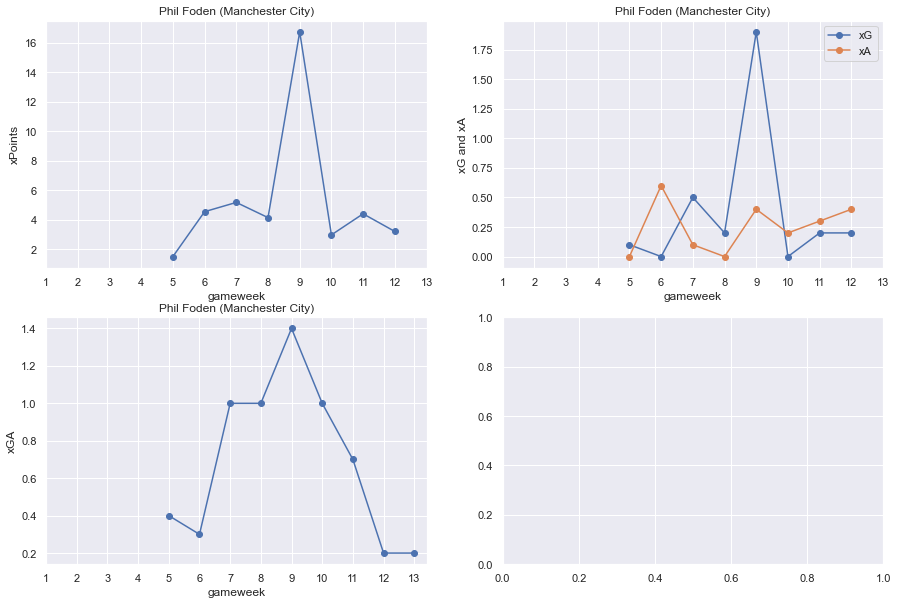

In [15]:
# find player index
name_string = 'Foden'
playersFound = df[df['web_name'].str.contains(name_string)]
display(playersFound[['web_name','team_name','now_cost','games played','total_points','adjusted points',\
                      'points_per_game','adjusted points per game',f'gameweek {gameweek+1} prediction',\
                      'xPoints_next10', 'valuePoints metric']])
# plot xPoints over time
ix = playersFound.index[0]
#ix = 468

fig,ax = plt.subplots(2,2,figsize=(15,10))

ax[0,0].plot(game_weeks, df.loc[ix,column_xPoints], marker='o')
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
ax[0,0].set_title(title_string)
ax[0,0].set_xlabel('gameweek')
ax[0,0].set_ylabel('xPoints')
ax[0,0].set_xticks(game_weeks)

ax[0,1].plot(game_weeks, df.loc[ix,column_xG], marker='o')
ax[0,1].plot(game_weeks, df.loc[ix,column_xA], marker='o')
ax[0,1].legend(('xG','xA'))
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
ax[0,1].set_title(title_string)
ax[0,1].set_xlabel('gameweek')
ax[0,1].set_ylabel('xG and xA')
ax[0,1].set_xticks(game_weeks)

ax[1,0].plot(game_weeks, df.loc[ix,column_xGA], marker='o')
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
ax[1,0].set_title(title_string)
ax[1,0].set_xlabel('gameweek')
ax[1,0].set_ylabel('xGA')
ax[1,0].set_xticks(game_weeks)

plt.show()

## My team

In [16]:
session = requests.session()

In [17]:
filepath = Path('../../../access_control/FPL_access.txt')
with open(filepath) as file:
    text = file.read().splitlines()
    email = text[0]
    password = text[1]

In [18]:
url = 'https://users.premierleague.com/accounts/login/'

payload = {
'password': password,
'login': email,
'redirect_uri': 'https://fantasy.premierleague.com/a/login', 'app': 'plfpl-web'
}
session.post(url, data=payload)

<Response [200]>

In [19]:
response = session.get('https://fantasy.premierleague.com/api/my-team/3202682')
team = response.json()['picks']

In [20]:
my_player_ix = [player['element'] for player in team]
my_starting11 = my_player_ix[:-4]
my_subs = my_player_ix[-4:]

In [21]:
exp_avg = df.loc[my_starting11,'adjusted points per game'].sum() + \
                df.loc[my_starting11,'adjusted points per game'].max()
exp_next = df.loc[my_starting11, f'gameweek {gameweek+1} prediction'].sum() + \
                df.loc[my_starting11,f'gameweek {gameweek+1} prediction'].max()

print('STARTING 11')
print('Expected points on average: ' + str(exp_avg))
print('Predicted points next gameweek: ' + str(exp_next))
display(df.loc[my_starting11, ['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','form 10', \
           f'gameweek {gameweek+1} prediction','xPoints_next10', 'valuePoints metric']].head(numberToShow))
print('\nSUBSTITUTES')
display(df.loc[my_subs, ['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','form 10', \
         f'gameweek {gameweek+1} prediction', 'xPoints_next10', 'valuePoints metric']].head(numberToShow))

STARTING 11
Expected points on average: 67.73456039858482
Predicted points next gameweek: 57.77035355567932


,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,form 10,gameweek 14 prediction,xPoints_next10,valuePoints metric
id,,,,,,,,,,,
559,Ramsdale,Arsenal,49,10.0,5.4,3.789163,4.723315,4.492288,4.062099,38.955453,1.711769
256,Cancelo,Manchester City,67,13.0,6.2,6.115167,6.521419,6.243400,4.902034,41.799009,2.362495
237,Alexander-Arnold,Liverpool,79,11.0,8.0,6.913963,7.269056,6.791351,4.884090,47.713468,2.459878
142,James,Chelsea,63,10.0,7.6,5.635899,8.012752,6.009109,4.893924,46.627041,2.245396
144,Gallagher,Crystal Palace,61,12.0,5.8,5.094833,6.251940,5.108813,4.127905,39.784038,2.062838
196,Raphinha,Leeds United,67,11.0,4.8,4.465517,4.177446,4.781837,3.592003,36.536654,1.725180
233,Salah,Liverpool,130,13.0,10.1,8.225055,8.016314,8.006264,6.310527,60.233423,2.281220
265,Foden,Manchester City,82,8.0,5.1,5.525292,6.820515,5.328705,5.325053,49.571394,1.929516
430,Jiménez,Wolves,78,13.0,4.1,3.970231,4.254200,4.261300,4.202213,37.218066,1.421571



SUBSTITUTES


,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,form 10,gameweek 14 prediction,xPoints_next10,valuePoints metric
id,,,,,,,,,,,
376,Foster,Watford,41,8.0,3.5,3.871116,4.833942,3.863264,3.110466,36.085936,1.911808
145,Gilmour,Norwich City,44,6.0,2.7,2.587624,2.739849,3.076422,2.705113,24.380244,1.233601
302,Manquillo,Newcastle Utd,40,7.0,2.9,2.516428,2.110280,2.619640,3.347941,27.999303,1.258214
491,Livramento,Southampton,46,13.0,3.8,3.115365,3.668162,3.622698,3.132880,33.340725,1.452546


## Save data

In [22]:
# save data
filepath = '../data/fpl/data_week' + str(gameweek) + str('.csv')
df.to_csv(filepath)